In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.fep_control import fep_control
from combinators.model import active
from combinators.model import compose, foldable
from combinators.inference import importance, mcmc
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
target = fep_control.BipedalWalkerAgent(state_dim=12, batch_shape=(10,), trainable=False)
proposal = fep_control.RecognitionAgent(state_dim=12, action_dim=4, observation_dim=24, batch_shape=(10,),
                                        discrete_actions=False, name='BipedalWalkerAgent', trainable=True,
                                        goal=target.goal)
agent = importance.propose(target, proposal)

In [5]:
episode = active.ActiveEpisode(agent, 'BipedalWalker-v2')

In [6]:
(control, prediction, t), graph, log_weight = episode(render=True)

In [7]:
xi, trained_params, elbos = active.active_variational(episode, 1000, lr=1e-3, log_estimator=True, patience=100)

07/03/2019 15:29:52 Episode length: 80
07/03/2019 15:29:53 ELBO=-2.12359650e+02 per step at epoch 1
07/03/2019 15:29:53 Episode length: 71
07/03/2019 15:29:53 ELBO=-2.21183868e+02 per step at epoch 2
07/03/2019 15:29:54 Episode length: 76
07/03/2019 15:29:54 ELBO=-2.11968048e+02 per step at epoch 3
07/03/2019 15:29:54 Episode length: 48
07/03/2019 15:29:54 ELBO=-2.76350250e+02 per step at epoch 4
07/03/2019 15:29:55 Episode length: 52
07/03/2019 15:29:55 ELBO=-2.60201874e+02 per step at epoch 5
07/03/2019 15:29:55 Episode length: 55
07/03/2019 15:29:56 ELBO=-2.48148071e+02 per step at epoch 6
07/03/2019 15:29:56 Episode length: 88
07/03/2019 15:29:56 ELBO=-1.74403793e+02 per step at epoch 7
07/03/2019 15:29:57 Episode length: 107
07/03/2019 15:29:57 ELBO=-1.44138168e+02 per step at epoch 8
07/03/2019 15:29:58 Episode length: 121
07/03/2019 15:29:59 ELBO=-1.28630814e+02 per step at epoch 9
07/03/2019 15:29:59 Episode length: 87
07/03/2019 15:29:59 ELBO=-1.56749512e+02 per step at epoch 

Epoch   532: reducing learning rate of group 0 to 5.0000e-04.


07/03/2019 15:45:45 Episode length: 62
07/03/2019 15:45:46 ELBO=-5.61118355e+01 per step at epoch 534
07/03/2019 15:45:46 Episode length: 47
07/03/2019 15:45:46 ELBO=-5.34380836e+01 per step at epoch 535
07/03/2019 15:45:46 Episode length: 54
07/03/2019 15:45:47 ELBO=-5.87418442e+01 per step at epoch 536
07/03/2019 15:45:47 Episode length: 66
07/03/2019 15:45:47 ELBO=-4.58736916e+01 per step at epoch 537
07/03/2019 15:45:48 Episode length: 114
07/03/2019 15:45:48 ELBO=-4.74446869e+01 per step at epoch 538
07/03/2019 15:45:54 Episode length: 1141
07/03/2019 15:45:58 ELBO=-2.59649029e+01 per step at epoch 539
07/03/2019 15:45:59 Episode length: 91
07/03/2019 15:45:59 ELBO=-5.73090973e+01 per step at epoch 540
07/03/2019 15:46:00 Episode length: 47
07/03/2019 15:46:00 ELBO=-4.09680252e+01 per step at epoch 541
07/03/2019 15:46:00 Episode length: 51
07/03/2019 15:46:00 ELBO=-4.85442772e+01 per step at epoch 542
07/03/2019 15:46:01 Episode length: 80
07/03/2019 15:46:01 ELBO=-5.36566544e+01

Epoch   633: reducing learning rate of group 0 to 2.5000e-04.


07/03/2019 15:48:58 Episode length: 69
07/03/2019 15:48:58 ELBO=-4.43012276e+01 per step at epoch 635
07/03/2019 15:48:59 Episode length: 54
07/03/2019 15:48:59 ELBO=-4.66261482e+01 per step at epoch 636
07/03/2019 15:49:03 Episode length: 771
07/03/2019 15:49:06 ELBO=-2.82522087e+01 per step at epoch 637
07/03/2019 15:49:14 Episode length: 1601
07/03/2019 15:49:21 ELBO=-2.51532555e+01 per step at epoch 638
07/03/2019 15:49:29 Episode length: 1601
07/03/2019 15:49:36 ELBO=-2.52008114e+01 per step at epoch 639
07/03/2019 15:49:37 Episode length: 76
07/03/2019 15:49:37 ELBO=-4.59248009e+01 per step at epoch 640
07/03/2019 15:49:38 Episode length: 47
07/03/2019 15:49:38 ELBO=-4.01440010e+01 per step at epoch 641
07/03/2019 15:49:38 Episode length: 106
07/03/2019 15:49:39 ELBO=-3.73786964e+01 per step at epoch 642
07/03/2019 15:49:39 Episode length: 45
07/03/2019 15:49:39 ELBO=-4.84724731e+01 per step at epoch 643
07/03/2019 15:49:40 Episode length: 55
07/03/2019 15:49:40 ELBO=-4.83334084e

Epoch   734: reducing learning rate of group 0 to 1.2500e-04.


07/03/2019 15:57:40 Episode length: 98
07/03/2019 15:57:40 ELBO=-4.53832054e+01 per step at epoch 736
07/03/2019 15:57:40 Episode length: 91
07/03/2019 15:57:41 ELBO=-6.45969391e+01 per step at epoch 737
07/03/2019 15:57:41 Episode length: 41
07/03/2019 15:57:41 ELBO=-5.38255806e+01 per step at epoch 738
07/03/2019 15:57:42 Episode length: 67
07/03/2019 15:57:42 ELBO=-4.13853836e+01 per step at epoch 739
07/03/2019 15:57:44 Episode length: 435
07/03/2019 15:57:46 ELBO=-2.66944389e+01 per step at epoch 740
07/03/2019 15:57:47 Episode length: 100
07/03/2019 15:57:47 ELBO=-4.39476891e+01 per step at epoch 741
07/03/2019 15:57:56 Episode length: 1601
07/03/2019 15:58:02 ELBO=-3.84442101e+01 per step at epoch 742
07/03/2019 15:58:04 Episode length: 298
07/03/2019 15:58:05 ELBO=-3.15617790e+01 per step at epoch 743
07/03/2019 15:58:06 Episode length: 34
07/03/2019 15:58:06 ELBO=-4.79291077e+01 per step at epoch 744
07/03/2019 15:58:06 Episode length: 48
07/03/2019 15:58:06 ELBO=-5.54252205e+

Epoch   835: reducing learning rate of group 0 to 6.2500e-05.


07/03/2019 16:01:46 Episode length: 659
07/03/2019 16:01:49 ELBO=-2.64291725e+01 per step at epoch 837
07/03/2019 16:01:50 Episode length: 54
07/03/2019 16:01:50 ELBO=-3.65354691e+01 per step at epoch 838
07/03/2019 16:01:53 Episode length: 471
07/03/2019 16:01:54 ELBO=-2.94643955e+01 per step at epoch 839
07/03/2019 16:01:55 Episode length: 51
07/03/2019 16:01:55 ELBO=-3.99304695e+01 per step at epoch 840
07/03/2019 16:02:04 Episode length: 1601
07/03/2019 16:02:11 ELBO=-2.45401173e+01 per step at epoch 841
07/03/2019 16:02:11 Episode length: 47
07/03/2019 16:02:11 ELBO=-4.73694420e+01 per step at epoch 842
07/03/2019 16:02:12 Episode length: 84
07/03/2019 16:02:12 ELBO=-4.96121063e+01 per step at epoch 843
07/03/2019 16:02:12 Episode length: 53
07/03/2019 16:02:13 ELBO=-3.90769234e+01 per step at epoch 844
07/03/2019 16:02:13 Episode length: 64
07/03/2019 16:02:13 ELBO=-5.65364914e+01 per step at epoch 845
07/03/2019 16:02:14 Episode length: 68
07/03/2019 16:02:14 ELBO=-3.50857277e+0

Epoch   936: reducing learning rate of group 0 to 3.1250e-05.


07/03/2019 16:07:17 Episode length: 56
07/03/2019 16:07:17 ELBO=-4.75086899e+01 per step at epoch 938
07/03/2019 16:07:21 Episode length: 728
07/03/2019 16:07:25 ELBO=-2.64452744e+01 per step at epoch 939
07/03/2019 16:07:25 Episode length: 58
07/03/2019 16:07:25 ELBO=-4.69349403e+01 per step at epoch 940
07/03/2019 16:07:34 Episode length: 1601
07/03/2019 16:07:41 ELBO=-2.38239746e+01 per step at epoch 941
07/03/2019 16:07:51 Episode length: 1601
07/03/2019 16:08:01 ELBO=-2.34792728e+01 per step at epoch 942
07/03/2019 16:08:01 Episode length: 58
07/03/2019 16:08:02 ELBO=-3.99888229e+01 per step at epoch 943
07/03/2019 16:08:02 Episode length: 47
07/03/2019 16:08:03 ELBO=-5.19165192e+01 per step at epoch 944
07/03/2019 16:08:09 Episode length: 1137
07/03/2019 16:08:16 ELBO=-2.44778118e+01 per step at epoch 945
07/03/2019 16:08:26 Episode length: 1601
07/03/2019 16:08:36 ELBO=-2.37936611e+01 per step at epoch 946
07/03/2019 16:08:45 Episode length: 1601
07/03/2019 16:08:55 ELBO=-2.3395

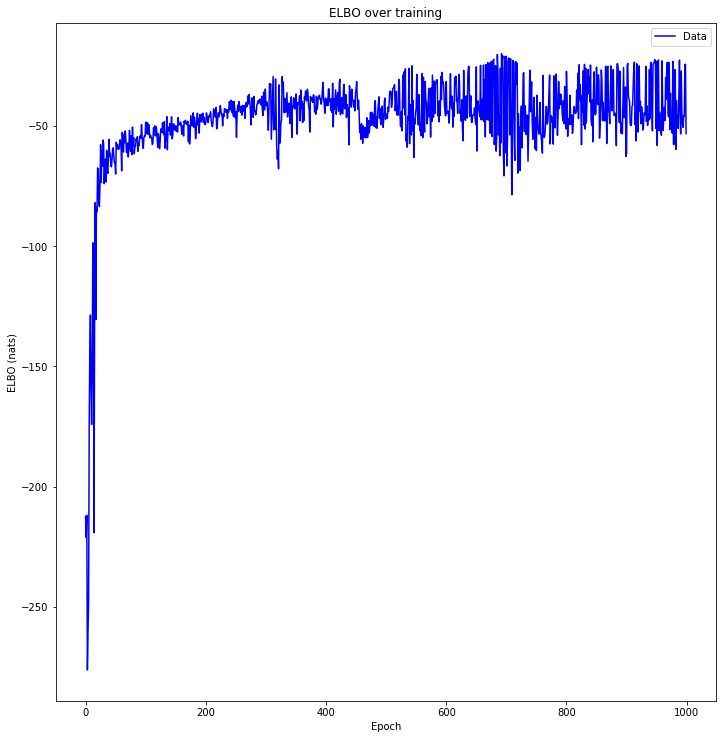

In [8]:
utils.plot_evidence_bounds(elbos[:, 0].cpu().detach().numpy())

In [9]:
(control, prediction, t), graph, log_weight = episode(render=True)

In [10]:
control

tensor([[-1.0000,  0.4420,  1.0000,  1.0000],
        [ 0.7869, -1.0000, -1.0000,  0.5629],
        [-0.0538, -0.4709,  0.5811,  0.5560],
        [-0.5011,  1.0000,  0.8441, -1.0000],
        [-1.0000, -0.8455, -1.0000,  1.0000],
        [ 0.4398, -1.0000,  0.3170,  1.0000],
        [ 0.7661, -0.3472, -0.1339, -0.8410],
        [-1.0000,  0.0658,  1.0000,  1.0000],
        [-1.0000, -1.0000, -0.5266,  0.1961],
        [ 0.8169, -1.0000,  1.0000,  1.0000]], grad_fn=<HardtanhBackward0>)

In [11]:
prediction

{'loc': tensor([[ 0.0593, -0.3794, -0.1420, -0.0716, -0.0504,  0.4018,  0.6158,  0.2244,
          -0.1494, -0.2476,  0.2020, -0.5262],
         [ 0.0667, -0.4689, -0.1482, -0.0943, -0.0586,  0.4224,  0.6872,  0.2623,
          -0.1648, -0.2952,  0.1721, -0.5726],
         [ 0.0535, -0.4000, -0.1648, -0.0961, -0.0474,  0.3935,  0.6460,  0.2215,
          -0.1646, -0.2802,  0.1845, -0.5343],
         [ 0.0870, -0.4887, -0.2394, -0.1292, -0.0557,  0.4227,  0.8023,  0.2804,
          -0.2015, -0.3571,  0.1955, -0.5846],
         [ 0.0512, -0.4798, -0.1856, -0.0885, -0.0041,  0.4115,  0.6956,  0.2617,
          -0.1731, -0.3254,  0.1818, -0.5266],
         [-0.0066, -0.2808, -0.0809, -0.0397, -0.0325,  0.4013,  0.4390,  0.1951,
          -0.0731, -0.1266,  0.2194, -0.4488],
         [ 0.0654, -0.4399, -0.2171, -0.1114, -0.0495,  0.3926,  0.7153,  0.2603,
          -0.1930, -0.3104,  0.1835, -0.5332],
         [ 0.0416, -0.3332, -0.1078, -0.0576, -0.0447,  0.3990,  0.5134,  0.2032,
        

In [12]:
t

1124

In [13]:
log_weight

tensor([-26941.7305, -26912.6230, -27121.5996, -27291.4180, -26827.4727,
        -27111.0645, -27149.8770, -27445.5527, -26807.4668, -26904.2305],
       grad_fn=<AddBackward0>)

In [14]:
torch.save(agent, 'examples/fep_control/fep_bipedal_walker_agent.dat')